In [4]:
import numpy as np
import pickle
import glob
import matplotlib.pyplot as plt
import cv2
import pandas as pd
!git clone "https://gitlab.com/ykristian/dataset-bunga"
%cd dataset-bunga/
with open("DatasetBunga.p", "rb") as f:
    data=pickle.load(f)

In [5]:
imgdata=np.array(data["img_data"])
print(imgdata.shape)
labeldata=np.array(data["label_data"])
print(labeldata.shape)

(4323, 224, 224, 3)
(4323,)


4


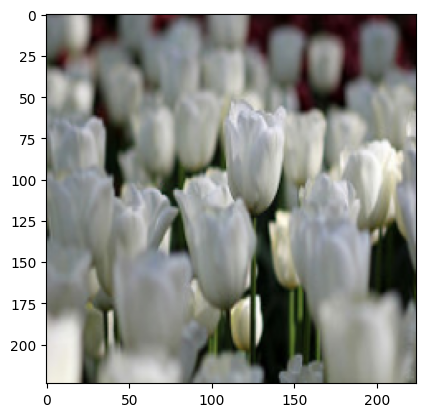

In [9]:
print(labeldata[3507])
plt.imshow(imgdata[3507])
#LABEL 0=Daisy 1=Dandelion 2=Rose 3=SUNFLOWER 4=TULIP

In [11]:
x=imgdata
y=pd.get_dummies(labeldata)
print(y.shape)
print(y.sample(15))

(4323, 5)
          0      1      2      3      4
1930  False  False   True  False  False
4255  False  False  False  False   True
673    True  False  False  False  False
3242  False  False  False   True  False
1217  False   True  False  False  False
3217  False  False  False   True  False
3134  False  False  False   True  False
2742  False  False  False   True  False
351    True  False  False  False  False
2429  False  False   True  False  False
2015  False  False   True  False  False
4280  False  False  False  False   True
1851  False  False   True  False  False
23     True  False  False  False  False
4172  False  False  False  False   True


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1011)

print("x_train Shape:",x_train.shape)
print("x_val Shape:",x_test.shape)

print("y_train Shape:",y_train.shape)
print("y_val Shape:",y_test.shape)

x_train Shape: (3458, 224, 224, 3)
x_val Shape: (865, 224, 224, 3)
y_train Shape: (3458, 5)
y_val Shape: (865, 5)


In [16]:
import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.applications.efficientnet_v2 import EfficientNetV2M

base_model=EfficientNetV2M(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.summary()

214201816/214201816 [==============================] - 19s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
               

                                                                                                  
 block2b_project_conv (Conv2D)  (None, 56, 56, 48)   9216        ['block2b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2b_project_bn (BatchNorma  (None, 56, 56, 48)  192         ['block2b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_drop (Dropout)         (None, 56, 56, 48)   0           ['block2b_project_bn[0][0]']     
                                                                                                  
 block2b_add (Add)              (None, 56, 56, 48)   0           ['block2b_drop[0][0]',           
          

 block3b_expand_conv (Conv2D)   (None, 28, 28, 320)  230400      ['block3a_project_bn[0][0]']     
                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 320)  1280       ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 320)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 80)   25600       ['block3b_expand_activation[0][0]
                                                                 ']                               
          

                                                                                                  
 block4a_dwconv2 (DepthwiseConv  (None, 14, 14, 320)  2880       ['block4a_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 14, 14, 320)  1280       ['block4a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 14, 14, 320)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_s

 block4c_se_squeeze (GlobalAver  (None, 640)         0           ['block4c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 640)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 40)     25640       ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4c_activation[0][0]',     
          

 block4e_se_reduce (Conv2D)     (None, 1, 1, 40)     25640       ['block4e_se_reshape[0][0]']     
                                                                                                  
 block4e_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4e_activation[0][0]',     
                                                                  'block4e_se_expand[0][0]']      
                                                                                                  
 block4e_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4e_project_conv[0][0]']   
 lization)

                                                                  'block4g_se_expand[0][0]']      
                                                                                                  
 block4g_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4g_se_excite[0][0]']      
                                                                                                  
 block4g_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4g_drop (Dropout)         (None, 14, 14, 160)  0           ['block4g_project_bn[0][0]']     
                                                                                                  
 block4g_add (Add)              (None, 14, 14, 160)  0           ['block4g_drop[0][0]',           
          

 block5b_add (Add)              (None, 14, 14, 176)  0           ['block5b_drop[0][0]',           
                                                                  'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, 14, 14, 1056  185856      ['block5b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5c_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5c_expand_activation (Act  (None, 14, 14, 1056  0          ['block5c_expand_bn[0][0]']      
 ivation) 

 block5e_expand_conv (Conv2D)   (None, 14, 14, 1056  185856      ['block5d_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5e_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5e_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5e_expand_activation (Act  (None, 14, 14, 1056  0          ['block5e_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5e_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5e_expand_activation[0][0]
 2D)      

 block5g_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5g_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5g_expand_activation (Act  (None, 14, 14, 1056  0          ['block5g_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5g_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5g_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5g_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5g_dwconv2[0][0]']        
 )        

 block5i_expand_activation (Act  (None, 14, 14, 1056  0          ['block5i_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5i_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5i_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5i_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5i_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5i_activation (Activation  (None, 14, 14, 1056  0          ['block5i_bn[0][0]']             
 )        

 block5k_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5k_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5k_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5k_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5k_activation (Activation  (None, 14, 14, 1056  0          ['block5k_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5k_se_squeeze (GlobalAver  (None, 1056)        0           ['block5k_activation[0][0]']     
 agePoolin

 block5m_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5m_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5m_activation (Activation  (None, 14, 14, 1056  0          ['block5m_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5m_se_squeeze (GlobalAver  (None, 1056)        0           ['block5m_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5m_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block5m_se_squeeze[0][0]']     
          

 block6a_activation (Activation  (None, 7, 7, 1056)  0           ['block6a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1056)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 44)     46508       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_s

 block6c_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6c_se_reduce[0][0]']      
                                                                                                  
 block6c_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6c_activation[0][0]',     
                                                                  'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_d

 block6e_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6e_se_excite[0][0]']      
                                                                                                  
 block6e_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 304)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 304)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_e

 block6g_drop (Dropout)         (None, 7, 7, 304)    0           ['block6g_project_bn[0][0]']     
                                                                                                  
 block6g_add (Add)              (None, 7, 7, 304)    0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_e

 block6j_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6i_add[0][0]']            
                                                                                                  
 block6j_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6j_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6j_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6j_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6j_expand_activation[0][0]
 2D)                                                             ']                               
          

 block6l_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6l_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6l_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6l_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6l_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6l_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 1824)  0           ['block6l_bn[0][0]']             
 )        

                                                                                                  
 block6n_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6n_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6n_activation (Activation  (None, 7, 7, 1824)  0           ['block6n_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6n_se_squeeze (GlobalAver  (None, 1824)        0           ['block6n_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6n_s

 )                                                                                                
                                                                                                  
 block6p_se_squeeze (GlobalAver  (None, 1824)        0           ['block6p_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6p_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6p_se_squeeze[0][0]']     
                                                                                                  
 block6p_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6p_se_reshape[0][0]']     
                                                                                                  
 block6p_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6p_se_reduce[0][0]']      
          

 block6r_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6r_se_squeeze[0][0]']     
                                                                                                  
 block6r_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6r_se_reshape[0][0]']     
                                                                                                  
 block6r_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6r_se_reduce[0][0]']      
                                                                                                  
 block6r_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6r_activation[0][0]',     
                                                                  'block6r_se_expand[0][0]']      
                                                                                                  
 block6r_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6r_se_excite[0][0]']      
          

                                                                                                  
 block7b_project_bn (BatchNorma  (None, 7, 7, 512)   2048        ['block7b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 7, 7, 512)    0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_add (Add)              (None, 7, 7, 512)    0           ['block7b_drop[0][0]',           
                                                                  'block7a_project_bn[0][0]']     
                                                                                                  
 block7c_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7b_add[0][0]']            
          

                                                                                                  
 block7d_add (Add)              (None, 7, 7, 512)    0           ['block7d_drop[0][0]',           
                                                                  'block7c_add[0][0]']            
                                                                                                  
 block7e_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7d_add[0][0]']            
                                                                                                  
 block7e_expand_bn (BatchNormal  (None, 7, 7, 3072)  12288       ['block7e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7e_expand_activation (Act  (None, 7, 7, 3072)  0           ['block7e_expand_bn[0][0]']      
 ivation) 

In [21]:
from keras.layers import BatchNormalization
from keras import Model

inp=base_model.input
m=base_model.output
m=Flatten()(m)
m=Dense(200, activation='relu', name='fc1')(m)
m=BatchNormalization()(m)
m=Dropout(0,3)(m)
m=Dense(100, activation='relu', name='fc2')(m)
m=Dropout(0,3)(m)
m=Dense(50, activation='relu', name='fc3')(m)
predictions= Dense(5, activation='softmax', name='pred')(m)

#model yang akan di train
model_new=Model(inputs=base_model.input, outputs=predictions)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                            

                                                                 ']                               
                                                                                                  
 block2b_project_bn (BatchNorma  (None, 56, 56, 48)  192         ['block2b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_drop (Dropout)         (None, 56, 56, 48)   0           ['block2b_project_bn[0][0]']     
                                                                                                  
 block2b_add (Add)              (None, 56, 56, 48)   0           ['block2b_drop[0][0]',           
                                                                  'block2a_project_bn[0][0]']     
                                                                                                  
 block2c_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 320)  1280       ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 320)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 80)   25600       ['block3b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 28, 28, 80)  320         ['block3b_project_conv[0][0]']   
 lization)

 2D)                                                             ']                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 14, 14, 320)  1280       ['block4a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 14, 14, 320)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 320)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 640)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 40)     25640       ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_p

 block4e_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4e_activation[0][0]',     
                                                                  'block4e_se_expand[0][0]']      
                                                                                                  
 block4e_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4e_d

 block4g_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4g_se_excite[0][0]']      
                                                                                                  
 block4g_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4g_drop (Dropout)         (None, 14, 14, 160)  0           ['block4g_project_bn[0][0]']     
                                                                                                  
 block4g_add (Add)              (None, 14, 14, 160)  0           ['block4g_drop[0][0]',           
                                                                  'block4f_add[0][0]']            
                                                                                                  
 block5a_e

                                                                                                  
 block5c_expand_conv (Conv2D)   (None, 14, 14, 1056  185856      ['block5b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5c_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5c_expand_activation (Act  (None, 14, 14, 1056  0          ['block5c_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5c_d

                                                                                                  
 block5e_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5e_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5e_expand_activation (Act  (None, 14, 14, 1056  0          ['block5e_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5e_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5e_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5e_b

                                                                                                  
 block5g_expand_activation (Act  (None, 14, 14, 1056  0          ['block5g_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5g_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5g_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5g_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5g_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5g_a

                                                                                                  
 block5i_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5i_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5i_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5i_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5i_activation (Activation  (None, 14, 14, 1056  0          ['block5i_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5i_s

                                                                                                  
 block5k_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5k_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5k_activation (Activation  (None, 14, 14, 1056  0          ['block5k_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5k_se_squeeze (GlobalAver  (None, 1056)        0           ['block5k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5k_s

                                                                                                  
 block5m_activation (Activation  (None, 14, 14, 1056  0          ['block5m_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5m_se_squeeze (GlobalAver  (None, 1056)        0           ['block5m_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5m_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block5m_se_squeeze[0][0]']     
                                                                                                  
 block5m_se_reduce (Conv2D)     (None, 1, 1, 44)     46508       ['block5m_se_reshape[0][0]']     
          

                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1056)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 44)     46508       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1056)   47520       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_s

 block6c_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6c_activation[0][0]',     
                                                                  'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 304)    0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_a

 block6e_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 304)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 304)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6e_add[0][0]']            
                                                                                                  
 block6f_e

 block6g_add (Add)              (None, 7, 7, 304)    0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6h_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6j_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6j_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6j_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6j_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6j_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6j_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6j_dwconv2[0][0]']        
 )        

                                                                                                  
 block6l_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6l_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6l_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6l_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 1824)  0           ['block6l_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6l_s

 )                                                                                                
                                                                                                  
 block6n_activation (Activation  (None, 7, 7, 1824)  0           ['block6n_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6n_se_squeeze (GlobalAver  (None, 1824)        0           ['block6n_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6n_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6n_se_squeeze[0][0]']     
                                                                                                  
 block6n_s

 block6p_se_squeeze (GlobalAver  (None, 1824)        0           ['block6p_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6p_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6p_se_squeeze[0][0]']     
                                                                                                  
 block6p_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6p_se_reshape[0][0]']     
                                                                                                  
 block6p_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6p_se_reduce[0][0]']      
                                                                                                  
 block6p_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6p_activation[0][0]',     
          

 block6r_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6r_se_reshape[0][0]']     
                                                                                                  
 block6r_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6r_se_reduce[0][0]']      
                                                                                                  
 block6r_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6r_activation[0][0]',     
                                                                  'block6r_se_expand[0][0]']      
                                                                                                  
 block6r_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6r_se_excite[0][0]']      
                                                                                                  
 block6r_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6r_project_conv[0][0]']   
 lization)

 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 7, 7, 512)    0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_add (Add)              (None, 7, 7, 512)    0           ['block7b_drop[0][0]',           
                                                                  'block7a_project_bn[0][0]']     
                                                                                                  
 block7c_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7b_add[0][0]']            
                                                                                                  
 block7c_expand_bn (BatchNormal  (None, 7, 7, 3072)  12288       ['block7c_expand_conv[0][0]']    
 ization) 

                                                                  'block7c_add[0][0]']            
                                                                                                  
 block7e_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7d_add[0][0]']            
                                                                                                  
 block7e_expand_bn (BatchNormal  (None, 7, 7, 3072)  12288       ['block7e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7e_expand_activation (Act  (None, 7, 7, 3072)  0           ['block7e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7e_d

In [22]:
for layer in model_new.layers:
    if layer.name =='block7e_dwconv2':
        break
    layer.trainable= False
    print('Layer' +layer.name+ 'frozen.')
model_new.summary()

Layerinput_1frozen.
Layerrescalingfrozen.
Layerstem_convfrozen.
Layerstem_bnfrozen.
Layerstem_activationfrozen.
Layerblock1a_project_convfrozen.
Layerblock1a_project_bnfrozen.
Layerblock1a_project_activationfrozen.
Layerblock1a_addfrozen.
Layerblock1b_project_convfrozen.
Layerblock1b_project_bnfrozen.
Layerblock1b_project_activationfrozen.
Layerblock1b_dropfrozen.
Layerblock1b_addfrozen.
Layerblock1c_project_convfrozen.
Layerblock1c_project_bnfrozen.
Layerblock1c_project_activationfrozen.
Layerblock1c_dropfrozen.
Layerblock1c_addfrozen.
Layerblock2a_expand_convfrozen.
Layerblock2a_expand_bnfrozen.
Layerblock2a_expand_activationfrozen.
Layerblock2a_project_convfrozen.
Layerblock2a_project_bnfrozen.
Layerblock2b_expand_convfrozen.
Layerblock2b_expand_bnfrozen.
Layerblock2b_expand_activationfrozen.
Layerblock2b_project_convfrozen.
Layerblock2b_project_bnfrozen.
Layerblock2b_dropfrozen.
Layerblock2b_addfrozen.
Layerblock2c_expand_convfrozen.
Layerblock2c_expand_bnfrozen.
Layerblock2c_expan

__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                                  
 stem_bn (

                                                                 ']                               
                                                                                                  
 block2b_project_bn (BatchNorma  (None, 56, 56, 48)  192         ['block2b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_drop (Dropout)         (None, 56, 56, 48)   0           ['block2b_project_bn[0][0]']     
                                                                                                  
 block2b_add (Add)              (None, 56, 56, 48)   0           ['block2b_drop[0][0]',           
                                                                  'block2a_project_bn[0][0]']     
                                                                                                  
 block2c_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 320)  1280       ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 320)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 80)   25600       ['block3b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 28, 28, 80)  320         ['block3b_project_conv[0][0]']   
 lization)

 2D)                                                             ']                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 14, 14, 320)  1280       ['block4a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 14, 14, 320)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 320)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 640)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 40)     25640       ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_p

 block4e_se_expand (Conv2D)     (None, 1, 1, 640)    26240       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_se_excite (Multiply)   (None, 14, 14, 640)  0           ['block4e_activation[0][0]',     
                                                                  'block4e_se_expand[0][0]']      
                                                                                                  
 block4e_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4e_d

 block4g_project_conv (Conv2D)  (None, 14, 14, 160)  102400      ['block4g_se_excite[0][0]']      
                                                                                                  
 block4g_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block4g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4g_drop (Dropout)         (None, 14, 14, 160)  0           ['block4g_project_bn[0][0]']     
                                                                                                  
 block4g_add (Add)              (None, 14, 14, 160)  0           ['block4g_drop[0][0]',           
                                                                  'block4f_add[0][0]']            
                                                                                                  
 block5a_e

                                                                                                  
 block5c_expand_conv (Conv2D)   (None, 14, 14, 1056  185856      ['block5b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5c_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5c_expand_activation (Act  (None, 14, 14, 1056  0          ['block5c_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5c_d

                                                                                                  
 block5e_expand_bn (BatchNormal  (None, 14, 14, 1056  4224       ['block5e_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5e_expand_activation (Act  (None, 14, 14, 1056  0          ['block5e_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5e_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5e_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5e_b

                                                                                                  
 block5g_expand_activation (Act  (None, 14, 14, 1056  0          ['block5g_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5g_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5g_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5g_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5g_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5g_a

                                                                                                  
 block5i_dwconv2 (DepthwiseConv  (None, 14, 14, 1056  9504       ['block5i_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5i_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5i_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5i_activation (Activation  (None, 14, 14, 1056  0          ['block5i_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5i_s

                                                                                                  
 block5k_bn (BatchNormalization  (None, 14, 14, 1056  4224       ['block5k_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5k_activation (Activation  (None, 14, 14, 1056  0          ['block5k_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5k_se_squeeze (GlobalAver  (None, 1056)        0           ['block5k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5k_s

                                                                                                  
 block5m_activation (Activation  (None, 14, 14, 1056  0          ['block5m_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5m_se_squeeze (GlobalAver  (None, 1056)        0           ['block5m_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5m_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block5m_se_squeeze[0][0]']     
                                                                                                  
 block5m_se_reduce (Conv2D)     (None, 1, 1, 44)     46508       ['block5m_se_reshape[0][0]']     
          

                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1056)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1056)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 44)     46508       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1056)   47520       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_s

 block6c_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6c_activation[0][0]',     
                                                                  'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 304)    0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_a

 block6e_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 304)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 304)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6e_add[0][0]']            
                                                                                                  
 block6f_e

 block6g_add (Add)              (None, 7, 7, 304)    0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 1824)   554496      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6h_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6j_expand_bn (BatchNormal  (None, 7, 7, 1824)  7296        ['block6j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6j_expand_activation (Act  (None, 7, 7, 1824)  0           ['block6j_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6j_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6j_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6j_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6j_dwconv2[0][0]']        
 )        

                                                                                                  
 block6l_dwconv2 (DepthwiseConv  (None, 7, 7, 1824)  16416       ['block6l_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6l_bn (BatchNormalization  (None, 7, 7, 1824)  7296        ['block6l_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 1824)  0           ['block6l_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6l_s

 )                                                                                                
                                                                                                  
 block6n_activation (Activation  (None, 7, 7, 1824)  0           ['block6n_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6n_se_squeeze (GlobalAver  (None, 1824)        0           ['block6n_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6n_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6n_se_squeeze[0][0]']     
                                                                                                  
 block6n_s

 block6p_se_squeeze (GlobalAver  (None, 1824)        0           ['block6p_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6p_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6p_se_squeeze[0][0]']     
                                                                                                  
 block6p_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6p_se_reshape[0][0]']     
                                                                                                  
 block6p_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6p_se_reduce[0][0]']      
                                                                                                  
 block6p_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6p_activation[0][0]',     
          

 block6r_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6r_se_reshape[0][0]']     
                                                                                                  
 block6r_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6r_se_reduce[0][0]']      
                                                                                                  
 block6r_se_excite (Multiply)   (None, 7, 7, 1824)   0           ['block6r_activation[0][0]',     
                                                                  'block6r_se_expand[0][0]']      
                                                                                                  
 block6r_project_conv (Conv2D)  (None, 7, 7, 304)    554496      ['block6r_se_excite[0][0]']      
                                                                                                  
 block6r_project_bn (BatchNorma  (None, 7, 7, 304)   1216        ['block6r_project_conv[0][0]']   
 lization)

 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 7, 7, 512)    0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_add (Add)              (None, 7, 7, 512)    0           ['block7b_drop[0][0]',           
                                                                  'block7a_project_bn[0][0]']     
                                                                                                  
 block7c_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7b_add[0][0]']            
                                                                                                  
 block7c_expand_bn (BatchNormal  (None, 7, 7, 3072)  12288       ['block7c_expand_conv[0][0]']    
 ization) 

                                                                  'block7c_add[0][0]']            
                                                                                                  
 block7e_expand_conv (Conv2D)   (None, 7, 7, 3072)   1572864     ['block7d_add[0][0]']            
                                                                                                  
 block7e_expand_bn (BatchNormal  (None, 7, 7, 3072)  12288       ['block7e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7e_expand_activation (Act  (None, 7, 7, 3072)  0           ['block7e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7e_d

In [35]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, amsgrad=True)
model_new.compile(optimizer=opt, loss="categorical_crossentropy", metrics = ["accuracy"])
h=model_new.fit(x_train,y_train, epochs=10, validation_data=(x_test, y_test), batch_size=50, verbose=1, shuffle=1)

Epoch 1/10
70/70 [==============================] - 526s 7s/step - loss: 0.4993 - accuracy: 0.8222 - val_loss: 0.5636 - val_accuracy: 0.8520
Epoch 2/10
70/70 [==============================] - 486s 7s/step - loss: 0.2298 - accuracy: 0.9237 - val_loss: 0.3063 - val_accuracy: 0.9052
Epoch 3/10
70/70 [==============================] - 486s 7s/step - loss: 0.1511 - accuracy: 0.9488 - val_loss: 0.3001 - val_accuracy: 0.9145
Epoch 4/10
70/70 [==============================] - 486s 7s/step - loss: 0.1333 - accuracy: 0.9581 - val_loss: 0.3297 - val_accuracy: 0.9133
Epoch 5/10
70/70 [==============================] - 486s 7s/step - loss: 0.0959 - accuracy: 0.9688 - val_loss: 0.3616 - val_accuracy: 0.9040
Epoch 6/10
70/70 [==============================] - 485s 7s/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.3554 - val_accuracy: 0.9133
Epoch 7/10
70/70 [==============================] - 486s 7s/step - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.3550 - val_accuracy: 0.9179
Epoch 8/10
70

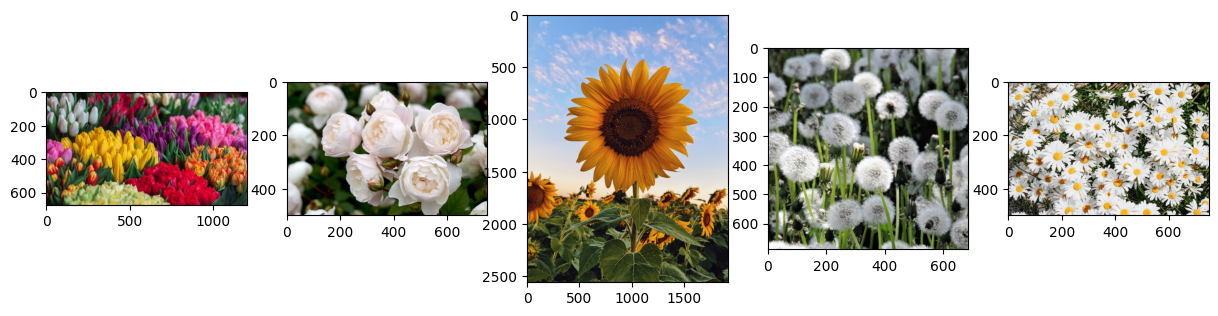

(5, 224, 224, 3)


In [44]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://cdn0-production-images-kly.akamaized.net/kaI3Cd105EfgqmsvPlsSs_7E4Tg=/1200x675/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/3110398/original/092684100_1587633234-Ilustrasi_tulip.jpg")
urls.append("https://asset.kompas.com/crops/bvJ9yrLHXuKJ1gWg9OA5V_t6pd0=/100x67:900x600/750x500/data/photo/2022/03/15/623038b21e1bb.jpg")
urls.append("https://assets.pikiran-rakyat.com/crop/0x0:0x0/x/photo/2022/04/12/113765407.jpg")
urls.append("https://images.tokopedia.net/img/cache/700/product-1/2018/10/19/10181747/10181747_dc285efe-bf30-4017-9af2-9e4992b954ec_685_689")
urls.append("https://asset.kompas.com/crops/FyXNOOJGN1XMvLVF0fJIhamCIvY=/0x0:750x500/750x500/data/photo/2021/05/13/609d41bc692d8.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
    r=requests.get(urls[u], stream=True)
    img=np.array(Image.open(r.raw))
    plt.subplot(1,len(urls),u+1)
    plt.imshow(img)
    img=cv2.resize(img,(224,224))
    imgs.append(img)
plt.show()
imgs=np.array(imgs)
print(imgs.shape)

In [45]:
yhat=model_new.predict(imgs)
for i in range(len(urls)):
    if(np.argmax(yhat[i])==0):
        print("Daisy")
    elif(np.argmax(yhat[i])==1):
        print("Dandelion")
    elif(np.argmax(yhat[i])==2):
        print("Rose")
    elif(np.argmax(yhat[i])==3):
        print("Sunflower")
    elif(np.argmax(yhat[i])==4):
        print("Tulip")
    

1/1 [==============================] - 2s 2s/step
Tulip
Rose
Sunflower
Dandelion
Daisy


In [ ]:
model_new.save(m.hdf5)